In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

images/停机坪.jpg


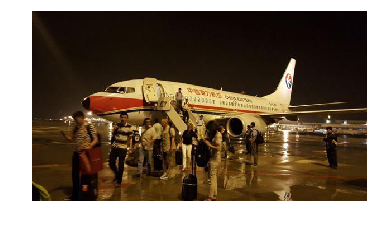

停机坪 (score = 0.89868)
机舱 (score = 0.02386)
游乐场 (score = 0.01388)
航站楼 (score = 0.01348)
艺术室 (score = 0.01101)

images/冰场.jpg


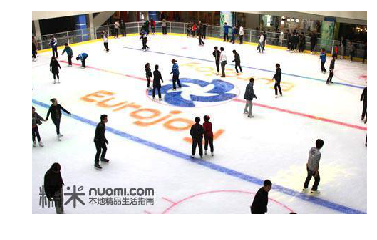

冰场 (score = 0.81811)
航站楼 (score = 0.03619)
游乐场 (score = 0.02783)
停机坪 (score = 0.02227)
艺术室 (score = 0.02173)

images/机舱.jpg


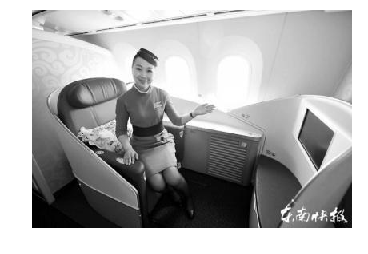

机舱 (score = 0.47633)
艺术室 (score = 0.16181)
流水线 (score = 0.07646)
航站楼 (score = 0.06517)
游乐场 (score = 0.05961)

images/棒球场.jpg


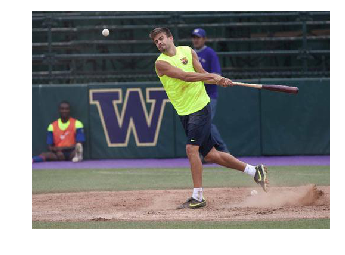

棒球场 (score = 0.62079)
橄榄球场 (score = 0.15662)
冰场 (score = 0.07550)
舞台 (score = 0.02811)
流水线 (score = 0.02613)

images/橄榄球场.jpg


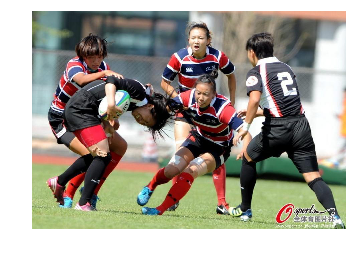

橄榄球场 (score = 0.90438)
棒球场 (score = 0.02997)
冰场 (score = 0.01285)
停机坪 (score = 0.00912)
游乐场 (score = 0.00909)

images/流水线.jpg


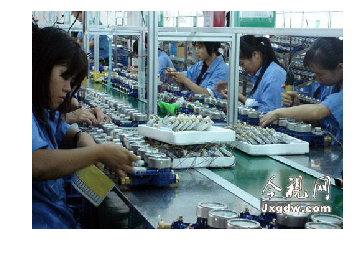

流水线 (score = 0.69892)
艺术室 (score = 0.16804)
航站楼 (score = 0.05002)
游乐场 (score = 0.02442)
机舱 (score = 0.01267)

images/游乐场.jpg


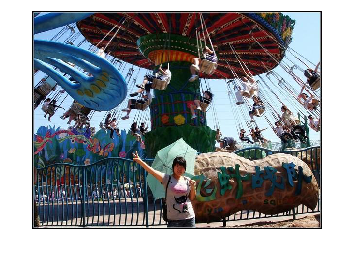

游乐场 (score = 0.76862)
冰场 (score = 0.03902)
艺术室 (score = 0.03883)
航站楼 (score = 0.02729)
流水线 (score = 0.02493)

images/舞台.jpg


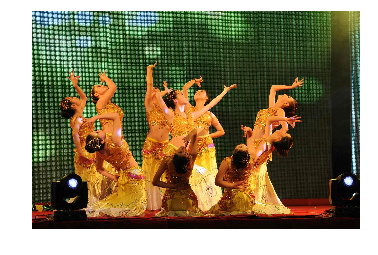

艺术室 (score = 0.25632)
游乐场 (score = 0.16232)
舞台 (score = 0.15995)
流水线 (score = 0.11727)
橄榄球场 (score = 0.08034)

images/航站楼.jpg


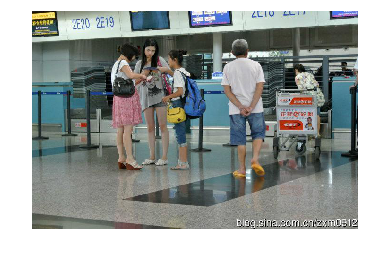

航站楼 (score = 0.78892)
流水线 (score = 0.06288)
冰场 (score = 0.04490)
舞台 (score = 0.03529)
机舱 (score = 0.02159)

images/艺术室.jpg


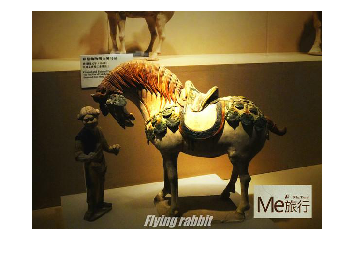

艺术室 (score = 0.49290)
游乐场 (score = 0.21823)
舞台 (score = 0.06514)
航站楼 (score = 0.04744)
流水线 (score = 0.03848)



In [4]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}

# 一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

# 分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放训练好的模型
with tf.gfile.GFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    # final_result为输出tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历目录
    for root,dirs,files in os.walk('images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型获得模型输出结果
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
            # 把结果转为1维数据
            predictions = np.squeeze(predictions)
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[-5:][::-1]
            for node_id in top_k:     
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()